# Module 3 Peer Review Assignment

# Problem 1

You work at a factory that manufactures light bulbs. You have determined that $5\%$ of light bulbs that are produced are defective. For each of the scenarios below:

1. Define an appropriate random variable and distribution.
2. State the values that the random variable can take on.
3. State any assumptions that you need to make.
4. Find the probability that the random variable you defined takes on the value $X=4$.

**Part a)**

**Out of 30 lightbulbs, $k$ are defective.**

**Answer**

The appropriate random variable for this scenario is the Binomial Distribution

$P(X = k) = \binom{n}{k} p^k (1 - p)^{n - k}$

The Binomial Distribution can take on the values

$\{0, 1, 2, \ldots, n\}$

or for this specific question

$\{0, 1, 2, \ldots, 30\}$

For this question we need to assume that the quality of each lightbulb (faulty or not) is independent of any other lightbulb.

The probability that there would be 4 defective lightbulbs in a sample of 30 is

$P(X = 4) = \binom{30}{4} 0.05^4 (1 - 0.05)^{30 - 4} = 0.045$

**Part b)**

**You test each lightbulb as it comes of the line. The $k^{th}$ light bulb is the first defective light bulb you find.**

**Answer**


The appropriate random variable for this scenario is First Success version of the Geometric distribution

$P(X = k) = (1-p)^{x-1}p$

In this case the the distribution can take on any value. While unlikely it is possible to continue testing lightbulbs without ever finding a faulty one.

$\{1, 2, \ldots, \infty \}$

We still need to assume that quality of each lightbulb is independent of all the others.


$P(X = 4) = (1-0.05)^{4-1}\cdot 0.05 =  0.043$


**Part c)**

**You find your second defective light bulb after observing $k$ light bulbs in all.**

**Answer**


For this scenario we have to use the Negative Binomial distribtution 

$P(X = x) = {x + r - 1 \choose r -1}p^r(1-p)^x$

In this case the the distribution can take on any value greater than $r$. We must test at least the total number of bulbs as our target number of sucesses $r$, but we could continually test without ever reaching $r$.

$\{r, r+1, \ldots, \infty \}$

We still need to assume that quality of each lightbulb is independent of all the others.

The standard Negative Binomial distribution counts _total failures_ ($x$) before the $r^{th}$ success, so we have to account for the question asking for total number of trials ($k$), not total number of failures. The total number of failures ($x$) is the number of total trials ($k$) minus the number of sucesses ($r$) 

$k(total)-r(successes)=x(failures)=4-2=2$

$P(X = 2) = {2 + 2 - 1 \choose 2 -1}0.05^2(1-0.05)^2$

$P(X = 2) = {3 \choose 1}0.05^2(0.95)^2=0.00676875$

In [44]:
#just double checking my math
print(dnbinom(2,2,0.05))

[1] 0.00676875


# Problem 2

Consider a loaded six-sided die that is twice as likely to roll an even number as an odd number. Let $X$ be random variable for value that is rolled from the die.

**Part a)**

**What is the Probability Mass Function for $X$. Write this out as a table.**

**Answer**


| Face value (X) | Probability   |
|------------|---------------|
| 1          | $1/9$ |
| 2          | $2/9$ |
| 3          | $1/9$ |
| 4          | $2/9$ |
| 5          | $1/9$ |
| 6          | $2/9$ |

**Part b)**

**What is the Cumulative Distribution Function for $X$?**

**Answer**


$F(X)=P(X\leq x)$

$F(1) = \dfrac{1}{9}$

$F(2) = \dfrac{3}{9}$

$F(3) = \dfrac{4}{9}$

$F(4) = \dfrac{6}{9}$

$F(5) = \dfrac{7}{9}$

$F(6) = \dfrac{9}{9}$

**Part c)** 

**What is $E[X]$?**

**Answer**


$E(X) = \sum\limits_{i} x_iP(X=x_i)$

This give the probability weighted mean of all of the outcomes.

$E(X) = 1(\frac{1}{9})+2(\frac{2}{9})+3(\frac{1}{9})+4(\frac{2}{9})+5(\frac{1}{9})+6(\frac{2}{9}) = \frac{11}{3} \approx 3.667$

# Problem 3

How would we simulate variables from these distributions in R? It'll turn out that the method is fairly similar across all these distributions so, for simplicity, let's just say we want to simulate $X \sim Bin(n,p)$. Take a look at the official documentation for this function [here](https://www.rdocumentation.org/packages/stats/versions/3.3/topics/Binomial). Not extremely clear, is it? Let's go through it one step at a time.

**Part a)** 

What if we want a random variable from this distribution? That is, we know some underlying distribution and we want to simulate many results from that distribution. Then we would use the "random generation" function `rbinom()`.

Play around with this function, with different `size` and `prob` parameters to get a feel for how it works. Finally, generate $30$ results from a $Bin(10, 0.3)$ distribution and plot a histogram of the results.

----

**Answer**


_Note: I wasn't sure if the question was asking for a plot of the result of each trial, or the distribution of the results across all trials, so I plotted both since it is interesting to see them together._

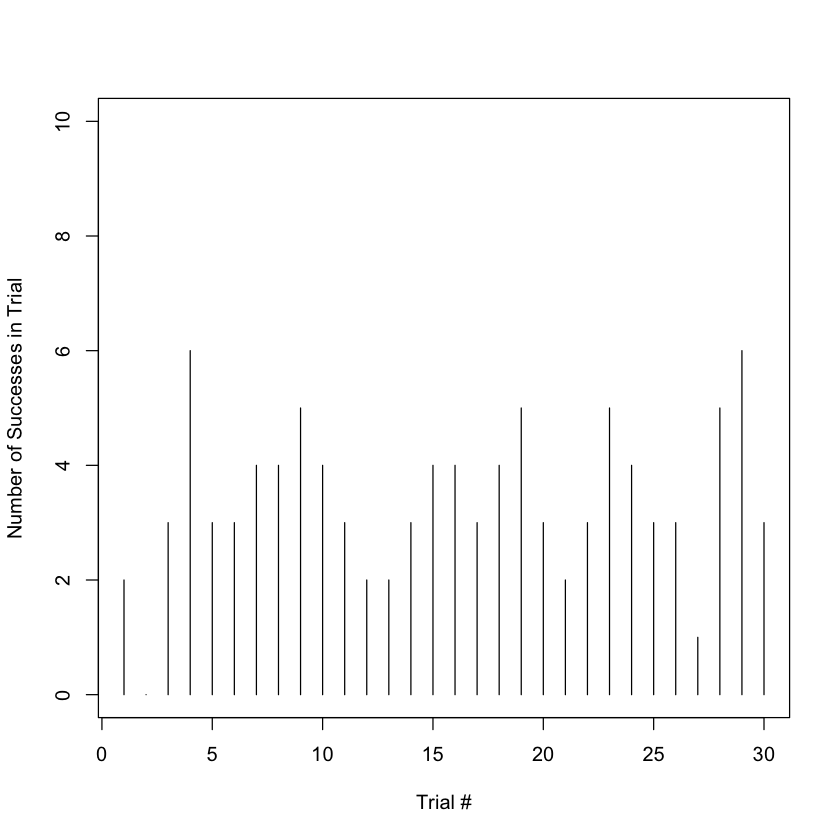

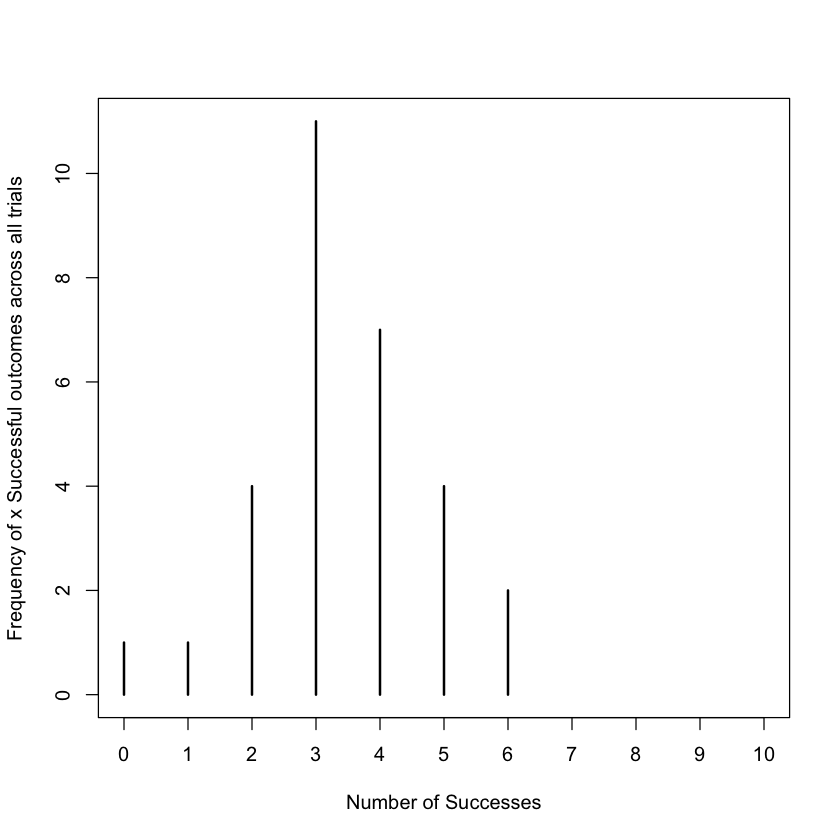

In [45]:
number_trials <- 30
trial_size <- 10
prob <- 0.3


# create a list of results (number of successes in each trial)
trials <- rbinom(number_trials, trial_size, prob) 

# count the number of times a certain number of
# successes occurred across all trials
count_success_frequency <- table(trials)


plot(trials,
     type = "h", 
     ylim = c(0,10),
     xlab = "Trial #",
     ylab = "Number of Successes in Trial")


plot(count_success_frequency, 
     type = "h", 
     xaxt = "n", 
     xlim = c(0,10), 
     xlab = "Number of Successes", 
     ylab = "Frequency of x Successful outcomes across all trials")

axis(side = 1, at = c(0:10), labels = c(0:10))

**Part b)**

What if we have some value $k$ and we want to know what's probability of generating $k$? That is, we're solving the Probability Mass Function $P(X=k)$. Then we would use the "density" function `dbinom()`.

Let $X \sim Bin(15, 0.4)$. By hand, solve $P(X=4)$. Then use the `dbinom()` function to confirm your result.

**Answer**


$P(X=x) = {n \choose x}p^x (1-p)^{n - x}$

$P(X=4) = {15 \choose 4}0.4^4 (1-0.4)^{15 - 4}$ 

$P(X=4) = 1365 \cdot 0.0256 \cdot 0.00363  \approx 0.1268$


In [46]:
print(dbinom(4,15,0.4))

[1] 0.1267758


**Part c)**

What if we wanted to solve for some value of the Cumulative Density Function? That is, we know $k$ and want to find $P(X \le k) = p$. Then we would use the "distribution function" `pbinom()`.

Let $X \sim Bin(15, 0.4)$. By hand, solve $P(X \le 4)$. Then use the `pbinom()` function to confirm your result.

**Answer**


$P(X=k) = {n \choose k}p^k q^{n - k}$

$F(X)=P(X\leq k) = \sum\limits_{x=0}^{k}{n \choose x}p^x q^{n - x}$

$P(X=0) = {15 \choose 0}0.4^0 (1-0.4)^{15 - 0} \approx 0.0004701849846$

$P(X=1) = {15 \choose 1}0.4^1 (1-0.4)^{15 - 1} \approx 0.00470184984576$

$P(X=2) = {15 \choose 2}0.4^2 (1-0.4)^{15 - 2} \approx 0.0219419659469$

$P(X=3) = {15 \choose 3}0.4^3 (1-0.4)^{15 - 3} \approx 0.0633879016243$

$P(X=4) = {15 \choose 4}0.4^4 (1-0.4)^{15 - 4} \approx 0.126775803249$

\begin{align*}
F(4) = &P(X=0) +  \\  &P(X=1) + \\ &P(X=2) + \\
      &P(X=3) +  \\ &P(X=4) \\
&\approx 0.217277705651
\end{align*}


In [47]:
print(pbinom(4,15,0.4))

[1] 0.2172777


**Part d)**

Finally, we have the "quantile" function `qbinom()`. This function is the reverse of the `pbinom()` function, in that it takes a probability $p$ as an argument and returns the value $k$ of the CDF that results in that much probability.

Use the `qbinom()` function to confirm your results from **Part c**. That is, plug in the probablity you got from **Part c** and see if you get the same $k$.

In [48]:
print(qbinom(0.217,15,0.4))

[1] 4


Nearly every distribution has these four functions, and they will be very useful for our future calculations and simulations.